## DECISION TREE

### IRIS

In [2]:
from sklearn import tree
from sklearn.datasets import load_iris, load_digits
import graphviz
import matplotlib

In [19]:
iris = load_iris()
x, y = iris.data, iris.target

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

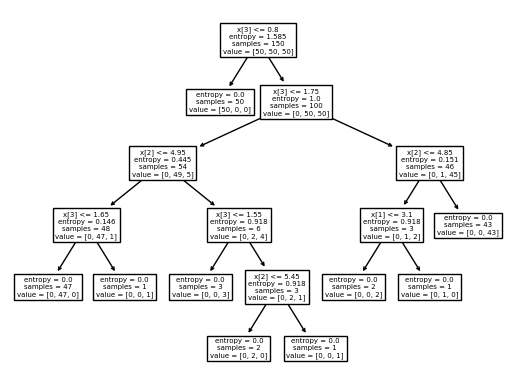

In [20]:
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(x, y)
tree.plot_tree(dtc)

In [21]:
dot_data = tree.export_graphviz(dtc,
feature_names=iris.feature_names,out_file=None,
class_names=iris.target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iristree")

'iristree.pdf'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
xTraining, xTesting, yTraining, yTesting = train_test_split(x, y, test_size=0.2, random_state=999)

In [27]:
yPrediction = dtc.predict(xTesting)
print(classification_report(yTesting, yPrediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# DTC thay should be used to avoid leaking dat and thus overfitting
dtc2 = tree.DecisionTreeClassifier(criterion="entropy")
dtc2.fit(xTraining, yTraining)

yPrediction = dtc2.predict(xTesting)
print(classification_report(yTesting, yPrediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.83      0.83         6
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



Text(0.5, 1.0, 'Iris Dataset DTC Proper Training')

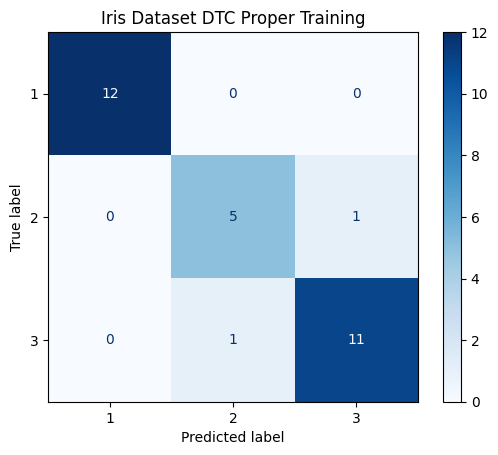

In [29]:
cm = confusion_matrix(yTesting, yPrediction)
cm = ConfusionMatrixDisplay(cm, display_labels=[1,2,3])
cm.plot(cmap="Blues")
cm.ax_.set_title("Iris Dataset DTC Proper Training")

### MNIST

In [30]:
digits = load_digits()
#use the data that makes up each image(np_array of the pixels)
x, y = digits.data, digits.target

In [31]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


[Text(0.502287079015544, 0.9615384615384616, 'x[42] <= 7.5\nentropy = 3.322\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(0.27436852331606215, 0.8846153846153846, 'x[26] <= 8.5\nentropy = 2.892\nsamples = 970\nvalue = [4, 119, 121, 171, 47, 170, 1, 119, 40, 178]'),
 Text(0.1489637305699482, 0.8076923076923077, 'x[43] <= 2.5\nentropy = 2.425\nsamples = 496\nvalue = [4, 57, 112, 163, 0, 9, 1, 88, 6, 56]'),
 Text(0.09585492227979274, 0.7307692307692307, 'x[30] <= 1.5\nentropy = 1.539\nsamples = 234\nvalue = [4, 16, 8, 147, 0, 1, 0, 2, 0, 56]'),
 Text(0.05699481865284974, 0.6538461538461539, 'x[19] <= 8.5\nentropy = 1.007\nsamples = 181\nvalue = [0, 13, 6, 147, 0, 1, 0, 0, 0, 14]'),
 Text(0.03367875647668394, 0.5769230769230769, 'x[29] <= 13.5\nentropy = 0.504\nsamples = 152\nvalue = [0, 0, 5, 139, 0, 0, 0, 0, 0, 8]'),
 Text(0.02072538860103627, 0.5, 'x[28] <= 7.5\nentropy = 0.171\nsamples = 138\nvalue = [0, 0, 2, 135, 0, 0, 0, 0, 0, 1]'),
 Text(0.010

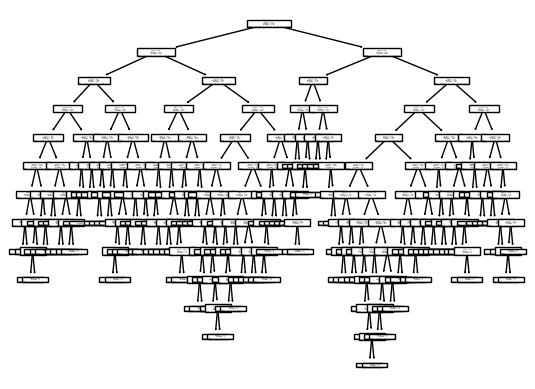

In [32]:
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(x, y)
tree.plot_tree(dtc)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
xTraining, xTesting, yTraining, yTesting = \
train_test_split(x, y, test_size=0.2, random_state=999)

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [38, 44, 38]'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\nentropy = 0.996\nsamples = 82\nvalue = [0, 44, 38]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 5.05\nentropy = 0.348\nsamples = 46\nvalue = [0, 43, 3]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.156\nsamples = 44\nvalue = [0, 43, 1]'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 2.75\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),


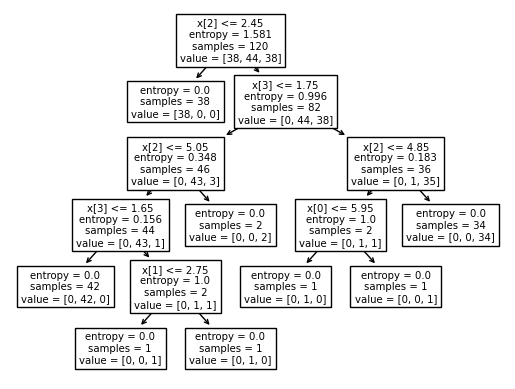

In [22]:
dtc2 = tree.DecisionTreeClassifier(criterion="entropy")
dtc2.fit(xTraining, yTraining)
tree.plot_tree(dtc2)
yPrediction = dtc2.predict(xTesting)

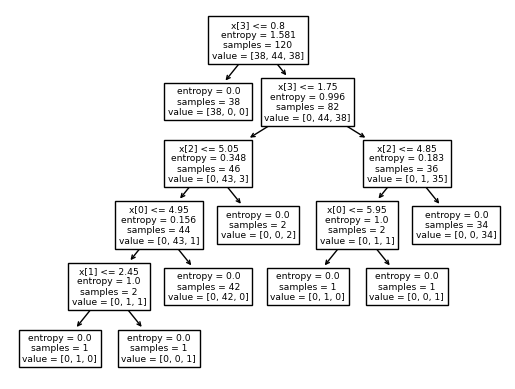

In [33]:
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(xTraining, yTraining)
tree.plot_tree(dtc)
yPrediction = dtc.predict(xTesting)

In [34]:
print(classification_report(yTesting, yPrediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.83      0.83         6
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (10).

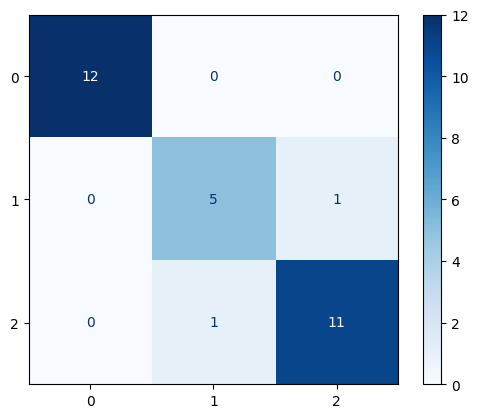

In [37]:
cm = confusion_matrix(yTesting, yPrediction)
cm = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6,7,8,9,10])
cm.plot(cmap="Blues")
cm.ax_.set_title("MNIST Dataset DTC")

## PERCEPTRON

### MNIST

In [12]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [34]:
digits = datasets.load_digits() # features matrix
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [35]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2, shuffle=False)

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
solver='sgd', verbose=10, random_state=1,
learning_rate_init=0.001)
mlp.fit(X_train, y_train)

Iteration 1, loss = 5.74349758
Iteration 2, loss = 2.56079407
Iteration 3, loss = 0.97648692
Iteration 4, loss = 0.56067333
Iteration 5, loss = 0.40491523
Iteration 6, loss = 0.32744240
Iteration 7, loss = 0.28026790
Iteration 8, loss = 0.24814913
Iteration 9, loss = 0.22317641
Iteration 10, loss = 0.20145081
Iteration 11, loss = 0.18683458
Iteration 12, loss = 0.17395672
Iteration 13, loss = 0.16145439
Iteration 14, loss = 0.15218976
Iteration 15, loss = 0.14403998
Iteration 16, loss = 0.13653101
Iteration 17, loss = 0.13035836
Iteration 18, loss = 0.12422554
Iteration 19, loss = 0.11921003
Iteration 20, loss = 0.11470242
Iteration 21, loss = 0.11060896
Iteration 22, loss = 0.10679697
Iteration 23, loss = 0.10265903
Iteration 24, loss = 0.09934603
Iteration 25, loss = 0.09576383
Iteration 26, loss = 0.09244611
Iteration 27, loss = 0.08984094
Iteration 28, loss = 0.08766426
Iteration 29, loss = 0.08584368
Iteration 30, loss = 0.08283121
Iteration 31, loss = 0.08112617
Iteration 32, los

MLPClassifier(max_iter=1000, random_state=1, solver='sgd', verbose=10)

In [37]:
y_pred = mlp.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [38]:
pre_macro = precision_score(y_test, y_pred, average='macro')
pre_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

print('Precision (macro): %.2f' % pre_macro , '\nPrecision (micro): %.2f' % pre_micro , '\nRecall (macro): %.2f' % recall_macro ,'\nRecall (micro): %.2f' % recall_micro)

Precision (macro): 0.92 
Precision (micro): 0.91 
Recall (macro): 0.91 
Recall (micro): 0.91


Text(0.5, 1.0, 'MNIST Dataset Perceptron')

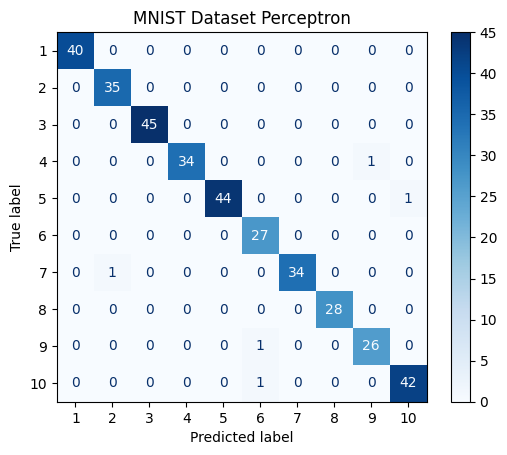

In [39]:
yPrediction = mlp.predict(xTesting)
cm = confusion_matrix(yTesting, yPrediction)
cm = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6,7,8,9,10])
cm.plot(cmap="Blues")
cm.ax_.set_title("MNIST Dataset Perceptron")

In [9]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
mlp_scores=[]
digits = datasets.load_digits() # features matrix
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
Y = digits.target
kf = KFold(n_splits=10)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
solver='sgd', verbose=10, random_state=1,
learning_rate_init=0.001)
for train_index, test_index in kf.split(X, Y):
    x_train_fold = X[train_index]
    y_train_fold = Y[train_index]
    x_test_fold = X[test_index]
    y_test_fold = Y[test_index]
    mlp.fit(x_train_fold, y_train_fold)
    y_pred_fold=mlp.predict(x_train_fold)
    mlp_scores.append(mlp.score(x_test_fold, y_test_fold))

Iteration 1, loss = 5.66950689
Iteration 2, loss = 2.09230768
Iteration 3, loss = 0.83077907
Iteration 4, loss = 0.51350130
Iteration 5, loss = 0.38747829
Iteration 6, loss = 0.32354903
Iteration 7, loss = 0.28308302
Iteration 8, loss = 0.25483435
Iteration 9, loss = 0.23418053
Iteration 10, loss = 0.21476743
Iteration 11, loss = 0.20395288
Iteration 12, loss = 0.18722021
Iteration 13, loss = 0.17629639
Iteration 14, loss = 0.16776453
Iteration 15, loss = 0.15907715
Iteration 16, loss = 0.15079755
Iteration 17, loss = 0.14310319
Iteration 18, loss = 0.13823802
Iteration 19, loss = 0.13157906
Iteration 20, loss = 0.12745014
Iteration 21, loss = 0.12371134
Iteration 22, loss = 0.12150093
Iteration 23, loss = 0.11564173
Iteration 24, loss = 0.11067865
Iteration 25, loss = 0.10688303
Iteration 26, loss = 0.10520038
Iteration 27, loss = 0.10147123
Iteration 28, loss = 0.09646251
Iteration 29, loss = 0.09343904
Iteration 30, loss = 0.09198400
Iteration 31, loss = 0.09178791
Iteration 32, los

In [57]:
from statistics import mean

print(max(mlp_scores))
print(mean(mlp_scores))

0.9944444444444445
0.9504500310366232


### IRIS

In [10]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [13]:
xTraining, xTesting, yTraining, yTesting = train_test_split(
    x, y, test_size=0.2, shuffle=True)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=999,
                    learning_rate_init=0.001)
mlp.fit(xTraining, yTraining)

Iteration 1, loss = 1.61330860
Iteration 2, loss = 1.56194616
Iteration 3, loss = 1.49498809
Iteration 4, loss = 1.41974567
Iteration 5, loss = 1.34256621
Iteration 6, loss = 1.26843713
Iteration 7, loss = 1.20016897
Iteration 8, loss = 1.13856833
Iteration 9, loss = 1.08386259
Iteration 10, loss = 1.03574814
Iteration 11, loss = 0.99412740
Iteration 12, loss = 0.95895253
Iteration 13, loss = 0.93055042
Iteration 14, loss = 0.90889527
Iteration 15, loss = 0.89369075
Iteration 16, loss = 0.88380644
Iteration 17, loss = 0.87763363
Iteration 18, loss = 0.87344732
Iteration 19, loss = 0.86952196
Iteration 20, loss = 0.86450521
Iteration 21, loss = 0.85762677
Iteration 22, loss = 0.84874346
Iteration 23, loss = 0.83818212
Iteration 24, loss = 0.82645574
Iteration 25, loss = 0.81421899
Iteration 26, loss = 0.80214366
Iteration 27, loss = 0.79074765
Iteration 28, loss = 0.78032228
Iteration 29, loss = 0.77097241
Iteration 30, loss = 0.76270303
Iteration 31, loss = 0.75539404
Iteration 32, los

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=999, solver='sgd', verbose=10)

In [14]:
yPrediction = mlp.predict(xTesting)

In [15]:
print('Accuracy: %.2f' % accuracy_score(yTesting, yPrediction))
pre_macro = precision_score(yTesting, yPrediction, average='macro')
pre_micro = precision_score(yTesting, yPrediction, average='micro')
recall_macro = recall_score(yTesting, yPrediction, average='macro')
recall_micro = recall_score(yTesting, yPrediction, average='micro')

print('Precision (macro): %.2f' % pre_macro, '\nPrecision (micro): %.2f' % pre_micro,
      '\nRecall (macro): %.2f' % recall_macro, '\nRecall (micro): %.2f' % recall_micro)

Accuracy: 0.90
Precision (macro): 0.92 
Precision (micro): 0.90 
Recall (macro): 0.91 
Recall (micro): 0.90


Text(0.5, 1.0, 'Iris Dataset Perceptron')

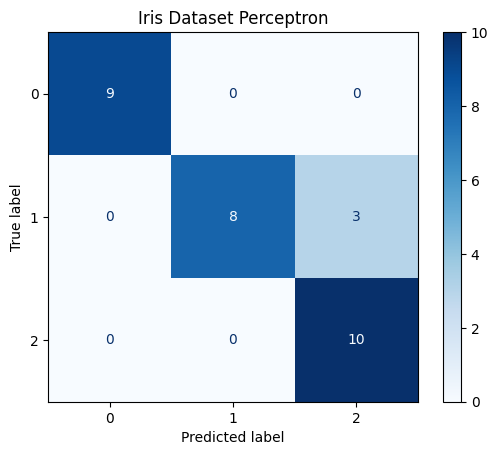

In [16]:
cm = confusion_matrix(yTesting, yPrediction)
cm = ConfusionMatrixDisplay(cm)
cm.plot(cmap="Blues")
cm.ax_.set_title("Iris Dataset Perceptron")

In [75]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from math.stats import mean

mlp_scores=[]
iris = datasets.load_iris() # features matrix
X = iris.data
Y = iris.target
kf = KFold(n_splits=10)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
solver='sgd', verbose=10, random_state=1,
learning_rate_init=0.001)
for train_index, test_index in kf.split(X, Y):
    x_train_fold = X[train_index]
    y_train_fold = Y[train_index]
    x_test_fold = X[test_index]
    y_test_fold = Y[test_index]
    mlp.fit(x_train_fold, y_train_fold)
    y_pred_fold=mlp.predict(x_train_fold)
    mlp_scores.append(mlp.score(x_test_fold, y_test_fold))

Iteration 1, loss = 1.66899165
Iteration 2, loss = 1.62547655
Iteration 3, loss = 1.56671452
Iteration 4, loss = 1.49785622
Iteration 5, loss = 1.42479173
Iteration 6, loss = 1.35349431
Iteration 7, loss = 1.28957979
Iteration 8, loss = 1.23755773
Iteration 9, loss = 1.19983595
Iteration 10, loss = 1.17603763
Iteration 11, loss = 1.16328470
Iteration 12, loss = 1.15735161
Iteration 13, loss = 1.15385460
Iteration 14, loss = 1.14930267
Iteration 15, loss = 1.14160972
Iteration 16, loss = 1.12994008
Iteration 17, loss = 1.11466094
Iteration 18, loss = 1.09699401
Iteration 19, loss = 1.07780335
Iteration 20, loss = 1.05822586
Iteration 21, loss = 1.03932441
Iteration 22, loss = 1.02175274
Iteration 23, loss = 1.00595072
Iteration 24, loss = 0.99198310
Iteration 25, loss = 0.97951869
Iteration 26, loss = 0.96833397
Iteration 27, loss = 0.95797794
Iteration 28, loss = 0.94804824
Iteration 29, loss = 0.93833779
Iteration 30, loss = 0.92877830
Iteration 31, loss = 0.91944436
Iteration 32, los

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.72911196
Iteration 67, loss = 0.72543697
Iteration 68, loss = 0.72182443
Iteration 69, loss = 0.71827169
Iteration 70, loss = 0.71477799
Iteration 71, loss = 0.71134132
Iteration 72, loss = 0.70796030
Iteration 73, loss = 0.70463645
Iteration 74, loss = 0.70136507
Iteration 75, loss = 0.69814309
Iteration 76, loss = 0.69497002
Iteration 77, loss = 0.69184544
Iteration 78, loss = 0.68876832
Iteration 79, loss = 0.68573756
Iteration 80, loss = 0.68275335
Iteration 81, loss = 0.67981341
Iteration 82, loss = 0.67691625
Iteration 83, loss = 0.67406125
Iteration 84, loss = 0.67124722
Iteration 85, loss = 0.66847375
Iteration 86, loss = 0.66574081
Iteration 87, loss = 0.66304707
Iteration 88, loss = 0.66039134
Iteration 89, loss = 0.65777290
Iteration 90, loss = 0.65519063
Iteration 91, loss = 0.65264395
Iteration 92, loss = 0.65013225
Iteration 93, loss = 0.64765599
Iteration 94, loss = 0.64521337
Iteration 95, loss = 0.64280288
Iteration 96, loss = 0.64042426
Iteratio

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 341, loss = 0.37962129
Iteration 342, loss = 0.37902125
Iteration 343, loss = 0.37842285
Iteration 344, loss = 0.37782603
Iteration 345, loss = 0.37723080
Iteration 346, loss = 0.37663703
Iteration 347, loss = 0.37604466
Iteration 348, loss = 0.37545365
Iteration 349, loss = 0.37486402
Iteration 350, loss = 0.37427585
Iteration 351, loss = 0.37368937
Iteration 352, loss = 0.37310433
Iteration 353, loss = 0.37252068
Iteration 354, loss = 0.37193845
Iteration 355, loss = 0.37135764
Iteration 356, loss = 0.37077834
Iteration 357, loss = 0.37020037
Iteration 358, loss = 0.36962373
Iteration 359, loss = 0.36904853
Iteration 360, loss = 0.36847488
Iteration 361, loss = 0.36790264
Iteration 362, loss = 0.36733187
Iteration 363, loss = 0.36676261
Iteration 364, loss = 0.36619469
Iteration 365, loss = 0.36562810
Iteration 366, loss = 0.36506275
Iteration 367, loss = 0.36449881
Iteration 368, loss = 0.36393630
Iteration 369, loss = 0.36337510
Iteration 370, loss = 0.36281523
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 188, loss = 0.44894721
Iteration 189, loss = 0.44807087
Iteration 190, loss = 0.44719980
Iteration 191, loss = 0.44633203
Iteration 192, loss = 0.44546954
Iteration 193, loss = 0.44461090
Iteration 194, loss = 0.44375474
Iteration 195, loss = 0.44290314
Iteration 196, loss = 0.44205607
Iteration 197, loss = 0.44121514
Iteration 198, loss = 0.44037920
Iteration 199, loss = 0.43954768
Iteration 200, loss = 0.43871999
Iteration 201, loss = 0.43789529
Iteration 202, loss = 0.43707486
Iteration 203, loss = 0.43625882
Iteration 204, loss = 0.43544520
Iteration 205, loss = 0.43463450
Iteration 206, loss = 0.43382434
Iteration 207, loss = 0.43301842
Iteration 208, loss = 0.43221611
Iteration 209, loss = 0.43141638
Iteration 210, loss = 0.43061887
Iteration 211, loss = 0.42982283
Iteration 212, loss = 0.42903015
Iteration 213, loss = 0.42823721
Iteration 214, loss = 0.42744456
Iteration 215, loss = 0.42665355
Iteration 216, loss = 0.42586454
Iteration 217, loss = 0.42507821
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 105, loss = 0.52521548
Iteration 106, loss = 0.52331465
Iteration 107, loss = 0.52144182
Iteration 108, loss = 0.51959462
Iteration 109, loss = 0.51777312
Iteration 110, loss = 0.51597657
Iteration 111, loss = 0.51420538
Iteration 112, loss = 0.51245907
Iteration 113, loss = 0.51073729
Iteration 114, loss = 0.50903999
Iteration 115, loss = 0.50736585
Iteration 116, loss = 0.50571460
Iteration 117, loss = 0.50408640
Iteration 118, loss = 0.50248010
Iteration 119, loss = 0.50089538
Iteration 120, loss = 0.49933163
Iteration 121, loss = 0.49778866
Iteration 122, loss = 0.49626615
Iteration 123, loss = 0.49476320
Iteration 124, loss = 0.49327950
Iteration 125, loss = 0.49181470
Iteration 126, loss = 0.49036818
Iteration 127, loss = 0.48893792
Iteration 128, loss = 0.48752507
Iteration 129, loss = 0.48612942
Iteration 130, loss = 0.48475056
Iteration 131, loss = 0.48338796
Iteration 132, loss = 0.48204155
Iteration 133, loss = 0.48071063
Iteration 134, loss = 0.47939492
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 407, loss = 0.30021733
Iteration 408, loss = 0.29981602
Iteration 409, loss = 0.29941494
Iteration 410, loss = 0.29901456
Iteration 411, loss = 0.29861530
Iteration 412, loss = 0.29821675
Iteration 413, loss = 0.29781881
Iteration 414, loss = 0.29742152
Iteration 415, loss = 0.29702494
Iteration 416, loss = 0.29662892
Iteration 417, loss = 0.29623353
Iteration 418, loss = 0.29583889
Iteration 419, loss = 0.29544558
Iteration 420, loss = 0.29505418
Iteration 421, loss = 0.29466374
Iteration 422, loss = 0.29427407
Iteration 423, loss = 0.29388555
Iteration 424, loss = 0.29349792
Iteration 425, loss = 0.29311156
Iteration 426, loss = 0.29272621
Iteration 427, loss = 0.29234167
Iteration 428, loss = 0.29195778
Iteration 429, loss = 0.29157466
Iteration 430, loss = 0.29119255
Iteration 431, loss = 0.29081164
Iteration 432, loss = 0.29043164
Iteration 433, loss = 0.29005265
Iteration 434, loss = 0.28967424
Iteration 435, loss = 0.28929668
Iteration 436, loss = 0.28892028
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 267, loss = 0.38826819
Iteration 268, loss = 0.38769995
Iteration 269, loss = 0.38713359
Iteration 270, loss = 0.38656919
Iteration 271, loss = 0.38600666
Iteration 272, loss = 0.38544533
Iteration 273, loss = 0.38488540
Iteration 274, loss = 0.38432710
Iteration 275, loss = 0.38377053
Iteration 276, loss = 0.38321571
Iteration 277, loss = 0.38266258
Iteration 278, loss = 0.38210939
Iteration 279, loss = 0.38155536
Iteration 280, loss = 0.38100238
Iteration 281, loss = 0.38045068
Iteration 282, loss = 0.37990036
Iteration 283, loss = 0.37935135
Iteration 284, loss = 0.37880382
Iteration 285, loss = 0.37825749
Iteration 286, loss = 0.37771246
Iteration 287, loss = 0.37716893
Iteration 288, loss = 0.37662683
Iteration 289, loss = 0.37608625
Iteration 290, loss = 0.37554746
Iteration 291, loss = 0.37501004
Iteration 292, loss = 0.37447391
Iteration 293, loss = 0.37393914
Iteration 294, loss = 0.37340534
Iteration 295, loss = 0.37287031
Iteration 296, loss = 0.37233450
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 148, loss = 0.49882488
Iteration 149, loss = 0.49760539
Iteration 150, loss = 0.49639741
Iteration 151, loss = 0.49520072
Iteration 152, loss = 0.49401510
Iteration 153, loss = 0.49284034
Iteration 154, loss = 0.49167622
Iteration 155, loss = 0.49052254
Iteration 156, loss = 0.48937910
Iteration 157, loss = 0.48824569
Iteration 158, loss = 0.48712198
Iteration 159, loss = 0.48600840
Iteration 160, loss = 0.48490472
Iteration 161, loss = 0.48381032
Iteration 162, loss = 0.48272484
Iteration 163, loss = 0.48164812
Iteration 164, loss = 0.48058022
Iteration 165, loss = 0.47952102
Iteration 166, loss = 0.47847035
Iteration 167, loss = 0.47742804
Iteration 168, loss = 0.47639395
Iteration 169, loss = 0.47536773
Iteration 170, loss = 0.47434939
Iteration 171, loss = 0.47333871
Iteration 172, loss = 0.47233559
Iteration 173, loss = 0.47133993
Iteration 174, loss = 0.47035172
Iteration 175, loss = 0.46937129
Iteration 176, loss = 0.46839784
Iteration 177, loss = 0.46743074
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 451, loss = 0.28506878
Iteration 452, loss = 0.28465766
Iteration 453, loss = 0.28424740
Iteration 454, loss = 0.28383801
Iteration 455, loss = 0.28342952
Iteration 456, loss = 0.28302187
Iteration 457, loss = 0.28261512
Iteration 458, loss = 0.28220927
Iteration 459, loss = 0.28180431
Iteration 460, loss = 0.28140021
Iteration 461, loss = 0.28099696
Iteration 462, loss = 0.28059455
Iteration 463, loss = 0.28019298
Iteration 464, loss = 0.27979226
Iteration 465, loss = 0.27939239
Iteration 466, loss = 0.27899335
Iteration 467, loss = 0.27859516
Iteration 468, loss = 0.27819780
Iteration 469, loss = 0.27780127
Iteration 470, loss = 0.27740556
Iteration 471, loss = 0.27701068
Iteration 472, loss = 0.27661661
Iteration 473, loss = 0.27622337
Iteration 474, loss = 0.27583095
Iteration 475, loss = 0.27543933
Iteration 476, loss = 0.27504853
Iteration 477, loss = 0.27465856
Iteration 478, loss = 0.27426941
Iteration 479, loss = 0.27388108
Iteration 480, loss = 0.27349355
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 358, loss = 0.33105727
Iteration 359, loss = 0.33053677
Iteration 360, loss = 0.33002150
Iteration 361, loss = 0.32951160
Iteration 362, loss = 0.32900425
Iteration 363, loss = 0.32849987
Iteration 364, loss = 0.32800141
Iteration 365, loss = 0.32750788
Iteration 366, loss = 0.32701629
Iteration 367, loss = 0.32652931
Iteration 368, loss = 0.32604447
Iteration 369, loss = 0.32556130
Iteration 370, loss = 0.32507989
Iteration 371, loss = 0.32460093
Iteration 372, loss = 0.32412449
Iteration 373, loss = 0.32364946
Iteration 374, loss = 0.32317586
Iteration 375, loss = 0.32270372
Iteration 376, loss = 0.32223394
Iteration 377, loss = 0.32176576
Iteration 378, loss = 0.32129883
Iteration 379, loss = 0.32083316
Iteration 380, loss = 0.32036871
Iteration 381, loss = 0.31990545
Iteration 382, loss = 0.31944336
Iteration 383, loss = 0.31898242
Iteration 384, loss = 0.31852262
Iteration 385, loss = 0.31806394
Iteration 386, loss = 0.31760636
Iteration 387, loss = 0.31714988
Iteration 

C:\Users\christian.henneveld\PycharmProjects\SOEN471\COMP472_A2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
from statistics import mean
print(max(mlp_scores))
print(mean(mlp_scores))

1.0
0.9266666666666666


In [ ]:
pre_macro = precision_score(yTesting, yPrediction, average='macro')
pre_micro = precision_score(yTesting, yPrediction, average='micro')
recall_macro = recall_score(yTesting, yPrediction, average='macro')
recall_micro = recall_score(yTesting, yPrediction, average='micro')

### COMPARISON

Looking at the confusion matrix for the four different runs, compare how the two classifiers perform on the two datasets. Inspect some error cases. Is there a systematic difference? Compile a one page comparison of the four different runs and validate your claims from the evidence your runs p

IRIS Dataset

Comparing confusion matrices between machine learning models you can see that the perceptron performs very poorly on the iris dataset. It manages to get rid of a whole class in itself. The reason for this is the training split within sklearn doesn't work the same as in spark or dask where it will randomly split the data and instead takes a given percentage of data from the beginning. This isn't random and will cause issues like above if you aren't careful if your data is orderd in a particular way..( I have redone the confusion matrix with shuffle on so you can see that it does indeed create 3 classes.)

I do however feel like the numbers are slightly skewed since the decision tree classifier for iris was trained on the full dataset so predicting the training set should be easy as it has already seen the data. Fitting the model on the training set and then predicting the test set yields slightly worse results. The accuracy of the models are significantly different for iris. The DTC has an accuracy of 92 whereas the perceptron has a 67% accurate result(given that you don't shuffle). The results also don't converge on the iris dataset after 1000 iterations so more iterations might be needed to yield better results. This leaves me no choice but to suggest the DTC when dealing with the iris dataset until more research can be done with the perceptron. The perceptron accuracy when it gives the 3 classes is 90 which is still slightly lower than the DTC

MNIST Dataset

 Both machine learning models worked fairly similarly. The accuracy using decision tree classifiers was 87% whereas it was 91% for the perceptron overall. It seems like either model works well when using MNIST dataset.
